###📢 PERHATIKAN

Bagian ini adalah lanjutan dari **EDA & Pre-Processing** yang berfokus pada implementasi model menggunakan beberapa metode klasifikasi yang kemudian disempurnakan menggunakan metode **Permutation Feature Selection (PFI)** sebagai metode seleksi fitur untuk mengurangi fitur yang tidak memiliki kontribusi signifikan terhadap model, sehingga kinerja model dapat dioptimalkan. Beberapa pengujian dilakukan untuk memperoleh insight mendalam dari peroses pengoptimalan metode klasifikasi menggunakan PFI.

> Proses Exploration Data Analysis (EDA) dan proses Pre-processing data dari proses ini dapat dibaca disini!!



#📥 **Import modules**

In [92]:
# Data manipulation modules
import pandas as pd
import numpy as np

# Graph modules
import matplotlib.pyplot as plt
import seaborn as sns

# Hyperparameter tunning module
from sklearn.model_selection import GridSearchCV

# Handle Imbalance dataset modules
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import KMeans

# Modelling & Evaluation modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from itertools import combinations

#📥 **Load graduation dataset (.csv)**

In [93]:
# Load graduation dataset from google drive directory
graduation_dataset = "/content/drive/MyDrive/Repository/Optimizing Classification Models using Permutation Feature Importance Method/Dataset/Graduation_final.csv"
df = pd.read_csv(graduation_dataset)
# Show dataframe of graduation dataset
df.head()

,is_Female,is_Male,Student ID,UKT,Parents' income,IPS 1,IPS 2,IPS 3,IPS 4,Retake total,Graduation status
0,1.0,0.0,mhs0001,0.677,0.0,0.630,0.000,0.00,0.000,0.0,0
1,0.0,1.0,mhs0002,0.677,0.0,0.825,0.802,0.86,0.862,0.0,0
2,0.0,1.0,mhs0003,0.677,0.0,0.575,0.610,0.75,0.720,0.0,0
3,0.0,1.0,mhs0004,0.677,0.0,0.825,0.865,0.86,0.875,0.0,0
4,0.0,1.0,mhs0005,0.839,0.0,0.022,0.000,0.00,0.000,0.0,0


# ***3. Splitting graduation dataset***

In [94]:
# Features (X): Drop "Student ID" and "Graduation status" columns
X = df.drop(["Student ID", "Graduation status"], axis=1)
# Target variable (y): "Graduation status" column
y = df["Graduation status"]
# Student IDs (id): "Student ID" column
id = df["Student ID"]

# Printing the shape of X and y to verify
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
# Displaying the first few rows of X, y, and id for verification
print("\nFirst few rows of X:")
print(X.head())
print("\nFirst few rows of y:")
print(y.head())
print("\nFirst few rows of id:")
print(id.head())

Shape of X: (455, 9)
Shape of y: (455,)

First few rows of X:
   is_Female  is_Male    UKT  Parents' income  IPS 1  IPS 2  IPS 3  IPS 4  \
0        1.0      0.0  0.677              0.0  0.630  0.000   0.00  0.000   
1        0.0      1.0  0.677              0.0  0.825  0.802   0.86  0.862   
2        0.0      1.0  0.677              0.0  0.575  0.610   0.75  0.720   
3        0.0      1.0  0.677              0.0  0.825  0.865   0.86  0.875   
4        0.0      1.0  0.839              0.0  0.022  0.000   0.00  0.000   

   Retake total  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

First few rows of y:
0    0
1    0
2    0
3    0
4    0
Name: Graduation status, dtype: int64

First few rows of id:
0    mhs0001
1    mhs0002
2    mhs0003
3    mhs0004
4    mhs0005
Name: Student ID, dtype: object


In [95]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, id, test_size=0.20, random_state=42)

# Printing the shapes of the resulting sets for verification
print("Shapes after splitting:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("id_train shape:", id_train.shape)
print("id_test shape:", id_test.shape)

Shapes after splitting:
X_train shape: (364, 9)
X_test shape: (91, 9)
y_train shape: (364,)
y_test shape: (91,)
id_train shape: (364,)
id_test shape: (91,)


# ***3. Handle Imbalanced Dataset (K-MeansSMOTE)***

In [96]:
# Create copies of the original training data for resampling process
X_train_resampling, y_train_resampling = X_train.copy(), y_train.copy()

smt = KMeansSMOTE(sampling_strategy=0.35,
                  random_state=42,
                  k_neighbors=9,
                  n_jobs=None,
                  kmeans_estimator=KMeans(
                      n_clusters=10,
                      random_state=42),
                  cluster_balance_threshold=0.2,
                  density_exponent='auto')

# Applying KMeansSMOTE to resample the training data
X_train_main, y_train_main = smt.fit_resample(X_train_resampling, y_train_resampling)

# Round the values in the resampled training data
X_train_main = np.round(X_train_main, decimals=3)

# Displaying the class balance of the original training data
print("Data Training Original")
print(y_train.value_counts())
# Displaying the class balance of the training data after SMOTE
print("Data Training + SMOTE")
print(y_train_main.value_counts())
# Displaying the number of data points in the test set
print("Data Testing")
print(y_test.value_counts())

Data Training Original
0    322
1     42
Name: Graduation status, dtype: int64
Data Training + SMOTE
0    322
1    112
Name: Graduation status, dtype: int64
Data Testing
0    84
1     7
Name: Graduation status, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# ***4. Hyperparameter Tuning***

In [97]:
# Create copies of the resampled training data for tuning
X_train_tun, y_train_tun = X_train_main.copy(), y_train_main.copy()

# Initialize the K-Nearest Neighbors Classifier
clf = KNeighborsClassifier()

# Define the parameters for tuning
parameters = {
    'n_neighbors': range(1, 50, 2),  # Number of nearest neighbors for KNN
    'weights': ['uniform', 'distance'],  # Weighting strategy for KNN
    'metric': ['euclidean', 'minkowski', 'manhattan']  # Distance metric for KNN
}

# Perform grid search with cross-validation
model = GridSearchCV(clf, parameters, cv=10, verbose=1)

# Fit the model on the training data
model.fit(X_train_tun, y_train_tun)

# Print the best hyperparameters found
print("Best Hyperparameters:", model.best_params_)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


# ***5. Modelling & Evaluation***

In [98]:
# Define the calculate_confusion_matrix function
def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate the elements of a confusion matrix.

    Parameters:
        - y_true: Array of true labels
        - y_pred: Array of predicted labels

    Returns:
        - tp: True Positives
        - tn: True Negatives
        - fp: False Positives
        - fn: False Negatives
    """
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

In [99]:
# Create a K-Nearest Neighbors (KNN) classifier object with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=model.best_params_['n_neighbors'],
                           weights=model.best_params_['weights'],
                           metric=model.best_params_['metric'])

## 5.1 Using original dataset

In [100]:
# Create copies of the original training and test sets
X_train_ori, y_train_ori = X_train.copy(), y_train.copy()
X_test_ori, y_test_ori = X_test.copy(), y_test.copy()

# Train the knn classifier on the original training set
knn.fit(X_train_ori, y_train_ori)

# Evaluate the model on the test set and make predictions
y_pred_ori = knn.predict(X_test_ori)

# Calculate the confusion matrix elements
tp, tn, fp, fn = calculate_confusion_matrix(y_test_ori, y_pred_ori)

# Print the elements of the confusion matrix
print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")

# Create a table for the confusion matrix
confusion_table = pd.DataFrame(
    {'Predicted 0': [tn, fn], 'Predicted 1': [fp, tp]},
    index=['Actual 0', 'Actual 1']
)
print("\nConfusion Matrix:")
print(confusion_table)

# Calculate the accuracy
accuracy = ((tp + tn) / (tp + tn + fp + fn))
print('Accuracy Score: {:.2f}%'.format(accuracy * 100))

# Calculate the recall
all_actual_positive = tp + fn
recall = (tp / all_actual_positive)
print('Recall Score: {:.2f}%'.format(recall * 100))

# Calculate the precision
all_predicted_positives = tp + fp
precision = (tp / all_predicted_positives)
print('Precision Score: {:.2f}%'.format(precision * 100))

# Calculate the f1-score
f1_score = ((2 * precision * recall) / (precision + recall))
print('f1-Score: {:.2f}%'.format(f1_score * 100))

True Positive (TP): 1
True Negative (TN): 80
False Positive (FP): 4
False Negative (FN): 6

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           80            4
Actual 1            6            1
Accuracy Score: 89.01%
Recall Score: 14.29%
Precision Score: 20.00%
f1-Score: 16.67%


## 5.2 Using more balanced dataset

In [101]:
# Create copies of the more balanced training sets
X_train_main, y_train_main = X_train_main.copy(), y_train_main.copy()
X_test_main, y_test_main = X_test.copy(), y_test.copy()

# Train the knn classifier on the more balanced training set
knn.fit(X_train_main, y_train_main)

# Evaluate the model on the test set and make predictions
y_pred_main = knn.predict(X_test_main)

# Calculate the confusion matrix elements
tp, tn, fp, fn = calculate_confusion_matrix(y_test_main, y_pred_main)

# Print the elements of the confusion matrix
print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")

# Create a table for the confusion matrix
confusion_table = pd.DataFrame(
    {'Predicted 0': [tn, fn], 'Predicted 1': [fp, tp]},
    index=['Actual 0', 'Actual 1']
)
print("\nConfusion Matrix:")
print(confusion_table)

# Calculate the accuracy
accuracy = ((tp + tn) / (tp + tn + fp + fn))
print('Accuracy Score: {:.2f}%'.format(accuracy * 100))

# Calculate the recall
all_actual_positive = tp + fn
recall = (tp / all_actual_positive)
print('Recall Score: {:.2f}%'.format(recall * 100))

# Calculate the precision
all_predicted_positives = tp + fp
precision = (tp / all_predicted_positives)
print('Precision Score: {:.2f}%'.format(precision * 100))

# Calculate the f1-score
f1_score = ((2 * precision * recall) / (precision + recall))
print('f1-Score: {:.2f}%'.format(f1_score * 100))

True Positive (TP): 4
True Negative (TN): 71
False Positive (FP): 13
False Negative (FN): 3

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           71           13
Actual 1            3            4
Accuracy Score: 82.42%
Recall Score: 57.14%
Precision Score: 23.53%
f1-Score: 33.33%


# ***6. 🔥 Optimization by PFI***

## 6.1 PFI test (10 iteration)

In [102]:
# Define the baseline accuracy
baseline_accuracy = accuracy

# Define the number of shuffles
n_shuffle_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create empty dictionary to store mean importances for each feature
mean_importances_per_feature = {feature: [] for feature in X_test_main.columns}

# Create a loop to iterate over different numbers of shuffles
for n_shuffles_ in n_shuffle_values:
    # Create empty lists to store the importances and mean accuracies
    importances = []
    mean_accuracies = []

    # Iterate over each feature
    for feature in X_test_main.columns:
        importance_scores = []
        accuracy_scores = []

        # Perform shuffling and evaluation n_shuffles_ times
        for _ in range(n_shuffles_):
            # Create a copy of the original test set
            X_test_shuffled = X_test_main.copy()
            # Shuffle the current feature
            X_test_shuffled[feature] = np.random.permutation(X_test_shuffled[feature])
            # Make predictions on the shuffled test set
            y_pred_permuted = knn.predict(X_test_shuffled)
            # Calculate the confusion matrix for the shuffled predictions
            tp, tn, fp, fn = calculate_confusion_matrix(y_test_main, y_pred_permuted)
            # Calculate the permuted accuracy
            permuted_accuracy = ((tp + tn) / (tp + tn + fp + fn))
            # Calculate the importance as the difference from the baseline accuracy
            importance = baseline_accuracy - permuted_accuracy
            # Append the importance and accuracy scores to the lists
            importance_scores.append(importance) # There are N_shuffle importance scores
            accuracy_scores.append(permuted_accuracy) # There are N_shuffle accuracy scores

        # Calculate the mean importance and accuracy for the current feature
        mean_importance = np.mean(importance_scores)
        mean_accuracy = np.mean(accuracy_scores)
        # Append the mean importance and accuracy to the respective lists
        importances.append(mean_importance) # Add mean importance score for each features
        mean_accuracies.append(mean_accuracy) # Add mean accuracy score for each features

        # Append mean importance to the dictionary for the current feature
        mean_importances_per_feature[feature].append(mean_importance)

    # Convert the importances to numpy arrays
    importances = np.array(importances)
    mean_accuracies = np.array(mean_accuracies)

    # Sort the features based on their importances
    indices = np.argsort(importances)

    # Create a DataFrame for the importance table
    importance_tables = pd.DataFrame(
        {'Feature': X_test_main.columns[indices], 'Importance': importances[indices], 'Mean Accuracy': mean_accuracies[indices]}
    )

    # Print the importance table for the current value of n_shuffles_
    print(f"Number of shuffles (n_shuffle_pfi = {n_shuffles_}):")
    display(importance_tables)
    print("\n")


# Calculate the mean of importances for each feature across different shuffles
mean_importances_across_shuffles = {
    feature: np.mean(importances) for feature, importances in mean_importances_per_feature.items()
}

# Create a DataFrame to display mean importances across shuffles
mean_importances_df = pd.DataFrame(
    {'Feature': list(mean_importances_across_shuffles.keys()), 'Mean Importance': list(mean_importances_across_shuffles.values())}
)

# Sort mean_importances_df by "Mean Importance" in ascending order
mean_importances_df = mean_importances_df.sort_values(by='Mean Importance', ascending=True)

Number of shuffles (n_shuffle_pfi = 10):


,Feature,Importance,Mean Accuracy
0,is_Male,-0.039560,0.863736
1,is_Female,-0.023077,0.847253
2,IPS 2,-0.009890,0.834066
3,IPS 3,-0.002198,0.826374
4,IPS 4,-0.001099,0.825275
5,Parents' income,0.000000,0.824176
6,Retake total,0.002198,0.821978
7,UKT,0.005495,0.818681
8,IPS 1,0.015385,0.808791




Number of shuffles (n_shuffle_pfi = 20):


,Feature,Importance,Mean Accuracy
0,is_Male,-0.045604,0.869780
1,is_Female,-0.034615,0.858791
2,IPS 2,-0.015385,0.839560
3,IPS 4,-0.014835,0.839011
4,IPS 3,-0.004396,0.828571
5,UKT,-0.002747,0.826923
6,Parents' income,0.000000,0.824176
7,Retake total,0.001648,0.822527
8,IPS 1,0.018681,0.805495




Number of shuffles (n_shuffle_pfi = 30):


,Feature,Importance,Mean Accuracy
0,is_Male,-0.044689,0.868864
1,is_Female,-0.039927,0.864103
2,IPS 2,-0.006593,0.830769
3,IPS 3,-0.004762,0.828938
4,IPS 4,-0.002564,0.826740
5,Retake total,-0.001832,0.826007
6,UKT,-0.001832,0.826007
7,Parents' income,0.000000,0.824176
8,IPS 1,0.017582,0.806593




Number of shuffles (n_shuffle_pfi = 40):


,Feature,Importance,Mean Accuracy
0,is_Male,-0.037637,0.861813
1,is_Female,-0.037363,0.861538
2,Retake total,-0.009066,0.833242
3,IPS 3,-0.009066,0.833242
4,IPS 4,-0.007967,0.832143
5,IPS 2,-0.006593,0.830769
6,UKT,-0.000549,0.824725
7,Parents' income,0.000000,0.824176
8,IPS 1,0.017033,0.807143




Number of shuffles (n_shuffle_pfi = 50):


,Feature,Importance,Mean Accuracy
0,is_Male,-0.039560,0.863736
1,is_Female,-0.034945,0.859121
2,IPS 2,-0.012308,0.836484
3,IPS 4,-0.003297,0.827473
4,IPS 3,-0.003077,0.827253
5,UKT,-0.002198,0.826374
6,Retake total,-0.001099,0.825275
7,Parents' income,0.000000,0.824176
8,IPS 1,0.015385,0.808791




Number of shuffles (n_shuffle_pfi = 60):


,Feature,Importance,Mean Accuracy
0,is_Male,-0.039377,0.863553
1,is_Female,-0.034615,0.858791
2,IPS 2,-0.012637,0.836813
3,IPS 3,-0.007143,0.831319
4,IPS 4,-0.006410,0.830586
5,Retake total,-0.003480,0.827656
6,Parents' income,0.000000,0.824176
7,UKT,0.000366,0.823810
8,IPS 1,0.012637,0.811538




Number of shuffles (n_shuffle_pfi = 70):


,Feature,Importance,Mean Accuracy
0,is_Male,-0.039246,0.863422
1,is_Female,-0.036421,0.860597
2,IPS 2,-0.010361,0.834537
3,IPS 3,-0.005808,0.829984
4,UKT,-0.002041,0.826217
5,IPS 4,-0.002041,0.826217
6,Retake total,-0.002041,0.826217
7,Parents' income,0.000000,0.824176
8,IPS 1,0.014129,0.810047




Number of shuffles (n_shuffle_pfi = 80):


,Feature,Importance,Mean Accuracy
0,is_Male,-0.040385,0.864560
1,is_Female,-0.038187,0.862363
2,IPS 2,-0.009753,0.833929
3,IPS 4,-0.004808,0.828984
4,UKT,-0.004670,0.828846
5,IPS 3,-0.004533,0.828709
6,Retake total,-0.001511,0.825687
7,Parents' income,0.000000,0.824176
8,IPS 1,0.012363,0.811813




Number of shuffles (n_shuffle_pfi = 90):


,Feature,Importance,Mean Accuracy
0,is_Female,-0.039805,0.863980
1,is_Male,-0.039438,0.863614
2,IPS 2,-0.011966,0.836142
3,UKT,-0.004762,0.828938
4,IPS 4,-0.004640,0.828816
5,IPS 3,-0.004518,0.828694
6,Retake total,-0.000855,0.825031
7,Parents' income,0.000000,0.824176
8,IPS 1,0.014286,0.809890




Number of shuffles (n_shuffle_pfi = 100):


,Feature,Importance,Mean Accuracy
0,is_Male,-0.039670,0.863846
1,is_Female,-0.038242,0.862418
2,IPS 2,-0.011648,0.835824
3,IPS 3,-0.006593,0.830769
4,IPS 4,-0.005165,0.829341
5,Retake total,-0.003297,0.827473
6,UKT,-0.001648,0.825824
7,Parents' income,0.000000,0.824176
8,IPS 1,0.013187,0.810989


## 6.2 Mean of 10 iteration test

In [103]:
# Display the DataFrame with mean importances across shuffles
print("Mean Importances Across Different Numbers of Shuffles:")
display(mean_importances_df)

Mean Importances Across Different Numbers of Shuffles:


,Feature,Mean Importance
1,is_Male,-0.040517
0,is_Female,-0.035720
5,IPS 2,-0.010713
7,IPS 4,-0.005283
6,IPS 3,-0.005209
8,Retake total,-0.001933
2,UKT,-0.001459
3,Parents' income,0.000000
4,IPS 1,0.015067


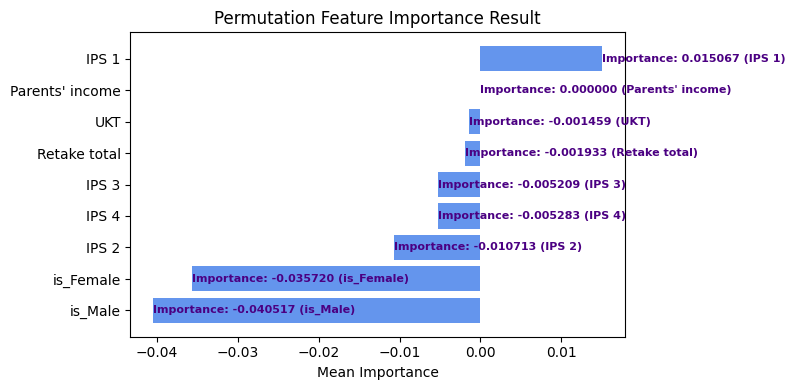

In [104]:
# Plot the permutation feature importance with feature names and their mean importance scores
plt.figure(figsize=(8, 4))

# Create horizontal bar plot
plt.barh(range(len(mean_importances_df)), mean_importances_df['Mean Importance'], align='center', color='cornflowerblue')
plt.yticks(range(len(mean_importances_df)), mean_importances_df['Feature'])

# Add importance scores next to the bars
for i, importance in enumerate(mean_importances_df['Mean Importance']):
    feature_name = mean_importances_df['Feature'].iloc[i]
    # Display the importance score along with the feature name
    plt.text(importance, i, f"Importance: {importance:.6f} ({feature_name})",
             color='indigo', fontweight='bold', fontsize=8, verticalalignment='center')

plt.xlabel('Mean Importance')
plt.title("Permutation Feature Importance Result")
plt.tight_layout()
plt.show()

## 6.3 Select irrelevant features

In [105]:
# Get the 3 features with the lowest mean importance scores
lowest_mean_importances_features = mean_importances_df.head(3)['Feature'].tolist()

# Print and display the 3 features with the lowest mean importance
print("3 Features with the Lowest Mean Importance:")
lowest_feature = pd.DataFrame({"Lowest importance": lowest_mean_importances_features})
lowest_feature

3 Features with the Lowest Mean Importance:


,Lowest importance
0,is_Male
1,is_Female
2,IPS 2


# ***7. 🏆 Final Modelling & Evaluatioan***

In [106]:
# Create copies of the more balanced training sets
X_train_op, y_train_op = X_train_main.copy(), y_train_main.copy()
X_test_op, y_test_op = X_test.copy(), y_test.copy()

# Initialize an empty list to collect dictionaries
results_data = []

# Prepare DataFrame to store results
results_df = pd.DataFrame(columns=['Removed Features', 'Confusion Matrix', 'Accuracy', 'Recall', 'Precision', 'F1-Score'])

# Loop through combinations and evaluations as before
for r in range(1, len(lowest_mean_importances_features) + 1):
    for combo in combinations(lowest_mean_importances_features, r):
        # Remove features from X_train and X_test
        X_train_reduced = X_train_op.drop(columns=list(combo))
        X_test_reduced = X_test_op.drop(columns=list(combo))

        # Train the KNN classifier
        knn.fit(X_train_reduced, y_train_op)

        # Evaluate the model on the test set and create a confusion matrix
        y_pred_op = knn.predict(X_test_reduced)

        # Calculate the confusion matrix and metrics
        tp, tn, fp, fn = calculate_confusion_matrix(y_test_op, y_pred_op)

        # Calculate Accuracy
        accuracy = ((tp + tn) / (tp + tn + fp + fn)) * 100

        # Calculate Recall
        all_actual_positive = tp + fn
        recall = (tp / all_actual_positive) * 100

        # Calculate Precision
        all_predicted_positives = tp + fp
        precision = (tp / all_predicted_positives) * 100

        # Calculate F1-Score
        f1_score = ((2 * precision * recall) / (precision + recall)) if (precision + recall) != 0 else 0

        # Determine the features used for this combination
        features_used = ', '.join(X_train_reduced.columns.tolist())

        # Updated section to add results to list instead of DataFrame directly
        results_data.append({
            'Removed Features': ', '.join(combo),
            'Features Used': features_used,
            'Confusion Matrix': f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}",
            'Accuracy': f"{accuracy:.2f}%",
            'Recall': f"{recall:.2f}%",
            'Precision': f"{precision:.2f}%",
            'F1-Score': f"{f1_score:.2f}%"
        })


# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_data)

# Display the results, sorted by Accuracy for better readability
display(results_df.sort_values(by='Accuracy', ascending=False))

,Removed Features,Features Used,Confusion Matrix,Accuracy,Recall,Precision,F1-Score
2,IPS 2,"is_Female, is_Male, UKT, Parents' income, IPS ...","TN: 73, FP: 11, FN: 3, TP: 4",84.62%,57.14%,26.67%,36.36%
4,"is_Male, IPS 2","is_Female, UKT, Parents' income, IPS 1, IPS 3,...","TN: 73, FP: 11, FN: 3, TP: 4",84.62%,57.14%,26.67%,36.36%
5,"is_Female, IPS 2","is_Male, UKT, Parents' income, IPS 1, IPS 3, I...","TN: 73, FP: 11, FN: 3, TP: 4",84.62%,57.14%,26.67%,36.36%
3,"is_Male, is_Female","UKT, Parents' income, IPS 1, IPS 2, IPS 3, IPS...","TN: 73, FP: 11, FN: 4, TP: 3",83.52%,42.86%,21.43%,28.57%
0,is_Male,"is_Female, UKT, Parents' income, IPS 1, IPS 2,...","TN: 71, FP: 13, FN: 3, TP: 4",82.42%,57.14%,23.53%,33.33%
1,is_Female,"is_Male, UKT, Parents' income, IPS 1, IPS 2, I...","TN: 71, FP: 13, FN: 3, TP: 4",82.42%,57.14%,23.53%,33.33%
6,"is_Male, is_Female, IPS 2","UKT, Parents' income, IPS 1, IPS 3, IPS 4, Ret...","TN: 72, FP: 12, FN: 6, TP: 1",80.22%,14.29%,7.69%,10.00%
